# Librerías necesarias

In [2]:
# !pip install gensim
# !pip install pyLDAvis

In [13]:
import random
import pandas as pd

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/matplotlib/backend_bases.py:55: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION
/usr/local/lib/python3.7/site-packages/matplotlib/backend_bases.py:55: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION


# Ejemplo con Reviews de Asistentes Virtuales

# Lectura de datos

In [4]:
df = pd.read_csv('../../datasets/reviews_sample.csv')

In [5]:
df.head()

,Unnamed: 0,id,author,instance_id,rating,review_body,review_date,review_header,review_link,review_votes,sentiment,verified_purchase
0,0,68,Iluvkindlle,10,3,It’s ok. Doesn’t know much. Can’t answer most ...,2018-09-10,It’s ok,https://www.amazon.com/gp/customer-reviews/R1Z...,0.0,0,True
1,1,70,Ben Burger,10,5,So easy to use.,2018-09-10,Love it,https://www.amazon.com/gp/customer-reviews/R1B...,0.0,0,True
2,2,72,Harry,10,5,Alexa is an entertaining assistant to have aro...,2018-09-10,Echo Dot,https://www.amazon.com/gp/customer-reviews/R1P...,0.0,0,True
3,3,292,Smart Shopper,10,4,Fun and addictive.,2018-09-10,Fun gadget,https://www.amazon.com/gp/customer-reviews/R38...,0.0,0,True
4,4,594,Niva T.,10,4,I think google home assist is much smarter and...,2018-09-11,Its good but prefer google,https://www.amazon.com/gp/customer-reviews/R18...,0.0,0,False


In [6]:
df.shape

(100, 12)

In [7]:
df = df[['review_body']]
df.dropna(inplace=True)

# Preprocesado

Lo hacemos con Gensim por "presentarlo", pero sabéis que opciones hay infinitas

In [12]:
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [9]:
print('Original text:\n{}\n\n'.format(df['review_body'][0]))
print('Processed text:\n{}'.format(text_preprocessing(df['review_body'][0])))

Original text:
It’s ok. Doesn’t know much. Can’t answer most of my questions. Should have gotten a google mini instead


Processed text:
['know', 'answer', 'questions', 'gotten', 'google', 'mini', 'instead']


In [10]:
processed_texts = []
for text in df['review_body']:
    processed_texts.append(text_preprocessing(text))

In [11]:
print(processed_texts[10])

['like', 'simplicity', 'excellent', 'voice', 'recognition', 'capability']


## Diccionario id - palabra

In [12]:
dictionary = Dictionary(processed_texts)

In [14]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [15]:
list(dictionary.items())

[(0, 'answer'),
 (1, 'google'),
 (2, 'gotten'),
 (3, 'instead'),
 (4, 'know'),
 (5, 'mini'),
 (6, 'questions'),
 (7, 'easy'),
 (8, 'alexa'),
 (9, 'assistant'),
 (10, 'entertaining'),
 (11, 'addictive'),
 (12, 'assist'),
 (13, 'better'),
 (14, 'great'),
 (15, 'home'),
 (16, 'kids'),
 (17, 'love'),
 (18, 'programs'),
 (19, 'smarter'),
 (20, 'think'),
 (21, 'works'),
 (22, 'bought'),
 (23, 'echo'),
 (24, 'loves'),
 (25, 'sister'),
 (26, 'commands'),
 (27, 'entry'),
 (28, 'generations'),
 (29, 'good'),
 (30, 'like'),
 (31, 'product'),
 (32, 'useful'),
 (33, 'voice'),
 (34, 'wait'),
 (35, 'personally'),
 (36, 'playing'),
 (37, 'spotify'),
 (38, 'alarm'),
 (39, 'clock'),
 (40, 'general'),
 (41, 'knowledge'),
 (42, 'music'),
 (43, 'perfect'),
 (44, 'actually'),
 (45, 'arrived'),
 (46, 'conversation'),
 (47, 'feeling'),
 (48, 'live'),
 (49, 'loneliness'),
 (50, 'lonely'),
 (51, 'longer'),
 (52, 'lost'),
 (53, 'mail'),
 (54, 'past'),
 (55, 'play'),
 (56, 'remember'),
 (57, 'talks'),
 (58, 'than

In [15]:
len(dictionary)

467

## Matriz documento-palabra

In [20]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

In [18]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1)],
 [(8, 1), (9, 1), (10, 1)],
 [(11, 1)],
 [(1, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(22, 1), (23, 1), (24, 1), (25, 1)],
 [(14, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(35, 1), (36, 1), (37, 1)],
 [(38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)],
 [(8, 3),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1)],
 [(30, 1), (33, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(1, 3),
  (4, 1),
  (6, 1),
  (7, 1),
  (8, 5),
  (20, 1),
  (29, 2),
  (65, 1),
  (66, 4),
  (67, 4),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 2),
  (78, 3),
  (79, 1),
  (80, 1),
  (81, 3),
  (82, 

In [17]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

## Entrenamos el modelo (LDA)

In [21]:
num_topics = 8

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

In [22]:
lda_model.show_topics()

[(0,
  '0.048*"love" + 0.033*"echo" + 0.024*"sound" + 0.022*"alexa" + 0.021*"music" + 0.020*"speaker" + 0.015*"great" + 0.014*"connection" + 0.013*"better" + 0.011*"weather"'),
 (1,
  '0.043*"time" + 0.016*"great" + 0.016*"good" + 0.016*"expertise" + 0.016*"takes" + 0.016*"gear" + 0.016*"purchased" + 0.016*"programed" + 0.015*"loves" + 0.015*"office"'),
 (2,
  '0.025*"room" + 0.025*"great" + 0.020*"alexa" + 0.019*"bluetooth" + 0.019*"laptop" + 0.018*"home" + 0.018*"amazon" + 0.013*"mobile" + 0.013*"recommend" + 0.013*"start"'),
 (3,
  '0.042*"great" + 0.037*"works" + 0.027*"easy" + 0.022*"music" + 0.019*"kids" + 0.016*"alarm" + 0.016*"clock" + 0.016*"gift" + 0.016*"awesome" + 0.014*"learning"'),
 (4,
  '0.023*"like" + 0.016*"google" + 0.016*"alexa" + 0.016*"know" + 0.015*"answer" + 0.015*"information" + 0.015*"given" + 0.015*"upset" + 0.015*"repeat" + 0.015*"recipe"'),
 (5,
  '0.029*"alexa" + 0.021*"thing" + 0.021*"ordered" + 0.014*"listening" + 0.014*"perfect" + 0.014*"night" + 0.014*

In [23]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08
0,love,time,room,great,like,alexa,alexa,love
1,echo,great,great,works,google,thing,product,alexa
2,sound,good,alexa,easy,alexa,ordered,amazon,like
3,alexa,expertise,bluetooth,music,know,listening,good,amazon
4,music,takes,laptop,kids,answer,perfect,link,phone
5,speaker,gear,home,alarm,information,night,apps,music
6,great,purchased,amazon,clock,given,actually,quality,excellent
7,connection,programed,mobile,gift,upset,recommend,great,alarm
8,better,loves,recommend,awesome,repeat,sockets,honeywell,bluetooth
9,weather,office,start,learning,recipe,smart,feedback,little


## Perplexity y Coherence

In [24]:
# Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.534467698663693

Coherence Score:  0.4709720044788238


In [25]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.115508 -0.109090       1        1  27.022161
6     -0.158589 -0.027939       2        1  16.909996
3      0.052649  0.163770       3        1  14.510947
2     -0.019000 -0.053101       4        1  11.889584
5      0.046937 -0.006124       5        1   9.909264
4     -0.040225  0.028752       6        1   9.026090
7      0.002298 -0.010069       7        1   8.875010
1      0.000422  0.013801       8        1   1.856946, topic_info=    Category       Freq         Term      Total  loglift  logprob
17   Default  15.000000         love  15.000000  30.0000  30.0000
99   Default   2.000000         time   2.000000  29.0000  29.0000
21   Default   6.000000        works   6.000000  28.0000  28.0000
14   Default  15.000000        great  15.000000  27.0000  27.0000
29   Default   7.000000         good   7.000000  26.0000  26.0000
66   Default   8.000000       amazon   8.000000  25.0000  25.0000
30   Default   7.000000         like   7.000000  24.0000  24.0000
42   Default  10.000000        music  10.000000  23.0000  23.0000
8    Default  21.000000        alexa  21.000000  22.0000  22.0000
23   Default  11.000000         echo  11.000000  21.0000  21.0000
7    Default   5.000000         easy   5.000000  20.0000  20.0000
31   Default   7.000000      product   7.000000  19.0000  19.0000
226  Default   4.000000         room   4.000000  18.0000  18.0000
24   Default   2.000000        loves   2.000000  17.0000  17.0000
263  Default   3.000000    bluetooth   3.000000  16.0000  16.0000
208  Default   2.000000        phone   2.000000  15.0000  15.0000
59   Default   3.000000        thing   3.000000  14.0000  14.0000
38   Default   4.000000        alarm   4.000000  13.0000  13.0000
315  Default   2.000000      ordered   2.000000  12.0000  12.0000
160  Default   6.000000        sound   6.000000  11.0000  11.0000
326  Default   3.000000       laptop   3.000000  10.0000  10.0000
84   Default   3.000000         link   3.000000   9.0000   9.0000
67   Default   3.000000         apps   3.000000   8.0000   8.0000
16   Default   3.000000         kids   3.000000   7.0000   7.0000
15   Default   4.000000         home   4.000000   6.0000   6.0000
138  Default   3.000000    recommend   3.000000   5.0000   5.0000
205  Default   4.000000      quality   4.000000   4.0000   4.0000
1    Default   5.000000       google   5.000000   3.0000   3.0000
62   Default   3.000000    excellent   3.000000   2.0000   2.0000
39   Default   2.000000        clock   2.000000   1.0000   1.0000
..       ...        ...          ...        ...      ...      ...
242   Topic8   0.029481         tiny   1.255912   0.2343  -6.3188
229   Topic8   0.029473    enjoyable   1.255971   0.2340  -6.3191
178   Topic8   0.028560  opportunity   1.185863   0.2600  -6.3506
131   Topic8   0.054022      awesome   4.166836  -0.3593  -5.7132
228   Topic8   0.029347        awful   1.256208   0.2296  -6.3234
232   Topic8   0.029305  microphones   1.256287   0.2281  -6.3248
238   Topic8   0.029303    responses   1.256288   0.2280  -6.3249
234   Topic8   0.029297         pick   1.256317   0.2278  -6.3251
241   Topic8   0.029233         talk   1.256395   0.2255  -6.3273
235   Topic8   0.029153     podcasts   1.256576   0.2226  -6.3300
90    Topic8   0.029243      results   1.312796   0.1820  -6.3269
1     Topic8   0.034028       google   5.414618  -1.0834  -6.1754
76    Topic8   0.030198       engine   2.023380  -0.2185  -6.2948
230   Topic8   0.030181        going   2.054603  -0.2344  -6.2954
233   Topic8   0.030037    perfectly   1.967863  -0.1960  -6.3001
8     Topic8   0.035339        alexa  21.618385  -2.4301  -6.1376
81    Topic8   0.030430    honeywell   2.735423  -0.5124  -6.2872
68    Topic8   0.029955      biggest   2.023801  -0.2268  -6.3029
138   Topic8   0.030839    recommend   3.778249  -0.8220  -6.2738
84    Topic8   0.030510         link   3.447944  -0

In [23]:
pyLDAvis.save_html(vis, '../results/topics_vis_0.html')

## Número óptimo de topics

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        
        # Create a list of LDA models
        model_list.append(model)
        
        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Grid sobre el número de topics (puede tardar un buen rato)

In [27]:
start_ = 4
end_ = 15
step_ = 1

In [26]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

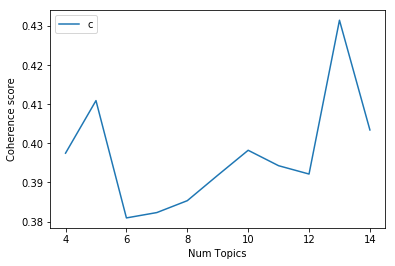

In [27]:
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [28]:
optimal_model_id = 7

In [29]:
optimal_model = model_list[optimal_model_id]

word_dict = {};
for i in range(11):
    words = optimal_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11
0,great,alexa,love,love,learning,music,great,alexa,excellent,great,good
1,alexa,amazon,speaker,like,product,alexa,works,amazon,easy,works,assistant
2,echo,connection,echo,useful,alexa,echo,alexa,apps,hold,like,addition
3,know,laptop,alexa,alexa,love,love,good,link,product,know,list
4,little,price,good,music,great,great,home,easy,recommended,love,office
5,life,echo,weather,product,little,alarm,list,honeywell,having,questions,music
6,music,crackle,convenient,good,gift,like,love,google,highly,answer,sound
7,speaker,questions,functions,time,easy,sound,frustrate,feedback,teenage,timer,alexa
8,price,year,plenty,timer,getting,night,think,alarm,bedroom,work,amazon
9,gadget,thing,product,weather,family,quality,google,sound,great,echo,link


# Topic dominante por texto

In [43]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [31]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=processed_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.8864,"great, works, like, know, love, questions, ans...","[know, answer, questions, gotten, google, mini..."
1,1,8.0,0.5454,"excellent, easy, hold, product, recommended, h...",[easy]
2,2,4.0,0.7727,"learning, product, alexa, love, great, little,...","[alexa, entertaining, assistant]"
3,3,5.0,0.5454,"music, alexa, echo, love, great, alarm, like, ...",[addictive]
4,4,6.0,0.9242,"great, works, alexa, good, home, list, love, f...","[think, google, home, assist, smarter, works, ..."
5,5,0.0,0.8182,"great, alexa, echo, know, little, life, music,...","[echo, bought, sister, loves]"
6,6,3.0,0.9174,"love, like, useful, alexa, music, product, goo...","[great, product, wait, generations, like, good..."
7,7,4.0,0.7727,"learning, product, alexa, love, great, little,...","[personally, playing, spotify]"
8,8,5.0,0.8701,"music, alexa, echo, love, great, alarm, like, ...","[perfect, alarm, clock, music, general, knowle..."
9,9,1.0,0.9605,"alexa, amazon, connection, laptop, price, echo...","[live, perfect, thing, lost, feeling, lonely, ..."


# Documento más representativo por topic

In [33]:
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([
        sent_topics_sorteddf_lda,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
        axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9840,"great, alexa, echo, know, little, life, music,...","[echo, alexa, friend, love, talking, alexa, aw..."
1,1.0,0.9740,"alexa, amazon, connection, laptop, price, echo...","[worth, buying, connect, amplifier, amplified,..."
2,2.0,0.9687,"love, speaker, echo, alexa, good, weather, con...","[skeptical, voice, assistant, life, convenient..."
3,3.0,0.9174,"love, like, useful, alexa, music, product, goo...","[great, product, wait, generations, like, good..."
4,4.0,0.8864,"learning, product, alexa, love, great, little,...","[hace, esperado, micrófonos, funcionan, bien, ..."
5,5.0,0.9707,"music, alexa, echo, love, great, alarm, like, ...","[actually, ordered, lightening, deal, loved, d..."
6,6.0,0.9242,"great, works, alexa, good, home, list, love, f...","[think, google, home, assist, smarter, works, ..."
7,7.0,0.9877,"alexa, amazon, apps, link, easy, honeywell, go...","[biggest, complaint, alexa, units, search, eng..."
8,8.0,0.9242,"excellent, easy, hold, product, recommended, h...","[easy, hold, teenage, bedroom, come, excellent..."
9,9.0,0.9351,"great, works, like, know, love, questions, ans...","[works, great, helpful, intercom, alarm, clock..."


# Distribución de topics en el corpus

In [34]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), num_topics)
df_topic_contribution = pd.DataFrame({'topic': topic_contribution.index, 'contribution': topic_contribution})
df_topic_contribution.reset_index(drop=True, inplace=True)

# Show
df_topic_contribution

,topic,contribution
0,0.0,0.145833
1,2.0,0.135417
2,5.0,0.135417
3,1.0,0.104167
4,3.0,0.104167
5,7.0,0.083333
6,6.0,0.072917
7,4.0,0.072917
8,8.0,0.062500
9,9.0,0.052083


# Ejemplo con el dataset 20 newsgroup

Dataset muy utilizado en NLP para entrenamiento y validación de modelos de clasificación, clustering y topic modeling. Contiene miles de artículos sobre 20 temas distintos divididos en entrenamiento y test.

Algunos temas están muy  relacionados entre sí mientras que otros son muy distintos.

http://qwone.com/~jason/20Newsgroups/

In [6]:
import pandas as pd

In [7]:
df_newsgroup = pd.read_csv('../../datasets/20_newsgroup.csv')

In [8]:
df_newsgroup.head()

,Unnamed: 0,text,target,title,date
0,0,I was wondering if anyone out there could enli...,7,rec.autos,2020-07-06 16:32:41.637605
1,17,I recently posted an article asking what kind ...,7,rec.autos,2020-07-06 16:32:41.637605
2,29,\nIt depends on your priorities. A lot of peo...,7,rec.autos,2020-07-06 16:32:41.637605
3,56,an excellent automatic can be found in the sub...,7,rec.autos,2020-07-06 16:32:41.637605
4,64,: Ford and his automobile. I need information...,7,rec.autos,2020-07-06 16:32:41.637605


In [34]:
df_newsgroup.dropna(subset=['text'], inplace=True)

In [35]:
df_newsgroup.shape

(11096, 5)

In [16]:
set(df_newsgroup['target'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [17]:
set(df_newsgroup['title'])

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [18]:
processed_texts_newsgroup = []
for text in df_newsgroup['text']:
    processed_texts_newsgroup.append(text_preprocessing(text))

In [21]:
processed_texts_newsgroup[0]

['wondering',
 'enlighten',
 'door',
 'sports',
 'looked',
 'late',
 'early',
 'called',
 'bricklin',
 'doors',
 'small',
 'addition',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'tellme',
 'model',
 'engine',
 'specs',
 'years',
 'production',
 'history',
 'info',
 'funky',
 'looking',
 'mail']

## Diccionario id-palabra y matrix documento-término

In [22]:
dictionary_newsgroup = Dictionary(processed_texts_newsgroup)
corpus_newsgroup = [dictionary_newsgroup.doc2bow(doc) for doc in processed_texts_newsgroup]

## LDA

In [32]:
num_topics = 5

lda_model_newsgroup = LdaModel(
    corpus=corpus_newsgroup,
    id2word=dictionary_newsgroup,
    num_topics=num_topics,
    passes=10
)

In [36]:
set(df_newsgroup['title'])

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [37]:
word_dict = {};
for i in range(num_topics):
    words = lda_model_newsgroup.show_topic(i, topn = 15)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,like,file,space,people,people
1,good,chip,nasa,think,government
2,year,mail,nist,know,president
3,game,available,launch,like,think
4,team,data,ncsl,believe,state
5,time,like,orbit,said,time
6,think,information,earth,jesus,going
7,games,program,shuttle,time,right
8,play,know,moon,good,know
9,know,anonymous,satellite,things,public


In [39]:
# Perplexity
print('\nPerplexity: ', lda_model_newsgroup.log_perplexity(corpus_newsgroup))

# Coherence Score
coherence_model_lda_newsgroup = CoherenceModel(model=lda_model_newsgroup, texts=processed_texts_newsgroup, dictionary=dictionary_newsgroup, coherence='c_v')
coherence_lda_newsgroup = coherence_model_lda_newsgroup.get_coherence()
print('\nCoherence Score: ', coherence_lda_newsgroup)


Perplexity:  -9.036349983338162

Coherence Score:  0.5403678993186496


## Visualización

In [ ]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis_newsgroup = pyLDAvis.gensim.prepare(lda_model_newsgroup, corpus_newsgroup, dictionary_newsgroup)
vis_newsgroup

In [ ]:
pyLDAvis.save_html(vis, '../results/topics_vis_newsgroups_0.html')

## Topic dominante por documento

In [44]:
df_topic_sents_keywords_newsgroup = format_topics_sentences(ldamodel=lda_model_newsgroup, corpus=corpus_newsgroup, texts=processed_texts_newsgroup)

# Format
df_dominant_topic_newsgroup = df_topic_sents_keywords_newsgroup.reset_index()
df_dominant_topic_newsgroup.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_newsgroup.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.6533,"like, good, year, game, team, time, think, gam...","[wondering, enlighten, door, sports, looked, l..."
1,1,0.0,0.7479,"like, good, year, game, team, time, think, gam...","[recently, posted, article, asking, kind, rate..."
2,2,0.0,0.8117,"like, good, year, game, team, time, think, gam...","[depends, priorities, people, higher, prioriti..."
3,3,0.0,0.8160,"like, good, year, game, team, time, think, gam...","[excellent, automatic, subaru, legacy, switche..."
4,4,0.0,0.4685,"like, good, year, game, team, time, think, gam...","[ford, automobile, need, information, ford, pa..."
5,5,3.0,0.4194,"people, think, know, like, believe, said, jesu...","[watch, attributions, appropriate, forum, disc..."
6,6,0.0,0.9458,"like, good, year, game, team, time, think, gam...","[avoid, problems, entirely, installing, drain,..."
7,7,0.0,0.8316,"like, good, year, game, team, time, think, gam...","[acura, integra, speed, miles, positively, wor..."
8,8,0.0,0.8314,"like, good, year, game, team, time, think, gam...","[assuming, turbo, gruffness, characteristic, l..."
9,9,0.0,0.6009,"like, good, year, game, team, time, think, gam...","[addition, restricted, mileage, classic, insur..."


In [41]:
sent_topics_sorteddf_lda_newsgroup = pd.DataFrame()

sent_topics_outdf_grpd_newsgroup = df_topic_sents_keywords_newsgroup.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd_newsgroup:
    sent_topics_sorteddf_lda_newsgroup = pd.concat([
        sent_topics_sorteddf_lda_newsgroup,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
        axis=0)

# Reset Index    
sent_topics_sorteddf_lda_newsgroup.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda_newsgroup.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda_newsgroup

NameError: name 'df_topic_sents_keywords_newsgroup' is not defined